<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA 
</center></font>


<center><h2>Actividad 7</h2></center>
<center><h3>Image</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Matias Armijo</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>
 

## 1. Operaciones usando Pytorch y OpenCV

### 1.1 Instala Numpy, Pytorch y OpenCV: 
- Carga una imagen desde un archivo con extensión JPG, usando numpy, pytorch y opencv.
- Presenta la imagen
- Transforma la imagen de color a escala de grises usando cada uno de los paquetes
- Guarda la imagen nueva.
- Presenta la imagen transformada en el notebook.

<p align="justify">
Asegurate de presentar adecuandamente la imagen, usando Matplotlib u otro medio de ploteo.

In [1]:
import cv2 as cv
import numpy as np
import torch
import matplotlib.pyplot as plt

# Carga de la imagen .jpg
jpg_path = "colorfultv.jpg"
img_cv = cv.imread(jpg_path)

# Presentacion de la imagen
cv.imshow('Imagen Normal', img_cv)

# waits for user to press any key 
# (this is necessary to avoid Python kernel form crashing) 
cv.waitKey(0) 
  
# closing all open windows 
cv.destroyAllWindows() 

### Formula para escala de grises (RGB):

$Grayscale =0.299\cdot R+0.587\cdot G+0.114\cdot B$

In [2]:
# Presentacion en escala de grises (utilizando opencv)
img_cv_gray = cv.imread(jpg_path,cv.IMREAD_GRAYSCALE)

# Presentacion en escala de grises (utilizando numpy)
# Ponderaciones típicas para la conversión a escala de grises
grayscale = [0.114, 0.587, 0.299]

# Convertir la imagen a escala de grises manualmente usando NumPy
img_np_gray = np.dot(img_cv[..., :3], grayscale)

# Convertir la imagen a un formato uint8 apropiado para visualizar
img_np_gray = img_np_gray.astype(np.uint8)


# Presentacion en escala de grises (utilizando pytorch)
# Convertir la imagen de NumPy a un tensor de PyTorch
img_torch_gray = torch.from_numpy(img_cv).float()

# Reordenar las dimensiones del tensor para que sean [canales, altura, ancho]
img_torch_gray = img_torch_gray.permute(2, 0, 1)

# Ponderaciones para convertir a escala de grises
grayscale_tensor = torch.tensor([0.114, 0.587, 0.299]).view(3, 1, 1)

# Aplicar las ponderaciones a los canales de color y sumar
img_torch_gray = (img_torch_gray * grayscale_tensor).sum(dim=0)

# Convertir el tensor de PyTorch a un array de NumPy
img_torch_gray = img_torch_gray.numpy().astype(np.uint8)

# Presentacion de la imagen
cv.imshow('Imagen en Escala de Grises (Numpy)', img_np_gray)
cv.imshow('Imagen en Escala de Grises (Opencv)',img_cv_gray)
cv.imshow('Imagen en Escala de Grises (Pytorch)', img_torch_gray)

cv.waitKey(0) 
cv.destroyAllWindows() 

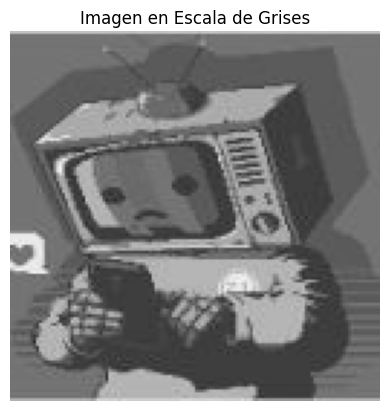

In [3]:
# Guardar la imagen en escala de grises usando OpenCV
cv.imwrite("colorfultv_gray.jpg", img_torch_gray)

# Mostrar la imagen en escala de grises usando Matplotlib
imagen_gris_cargada = cv.imread("colorfultv_gray.jpg")
plt.imshow(imagen_gris_cargada, cmap='gray')
plt.title('Imagen en Escala de Grises')
plt.axis('off')
plt.show()

## 2. Multiples operaciones con tensores
### ¡USA LA IMAGEN ADJUNTA image.png!

#### 2.1 Aplica una transformación puntual. Modifica el valor de los pixeles considerando un valor de umbral (threshold). la función de treshold debe ser una rampa con una pendiente dada (tu defines el valor de la pendiente) y cuyo valor mínimo será 0 y el máximo será 255 (valores típicos de los pixeles).

In [4]:
img = cv.imread("image.png")

# Parametros
threshold = 5
slope = 1.5

def threshold_transform(pixel,threshold,slope):
    if pixel < threshold:
        return max(0,pixel*slope)
    else:
        return min(255, pixel*slope)

img_transformada = np.zeros_like(img)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        for k in range(img.shape[2]):
            img_transformada[i,j,k] = threshold_transform(img[i,j,k],threshold,slope)

cv.imshow("Imagen original",img)
cv.imshow("Imagen transformada",img_transformada)
cv.waitKey(0) 
cv.destroyAllWindows() 

#### 2.2 Aplica una transformación en la vecindad. 
- Debes hacer una vecindad con dimensiones de 5x5 pixeles. 
- Aplica la transformación de tal forma que los pixeles cambien para tener el valor correspondiente al máximo de todos los vecinos.
- Debes hacer la misma operación a lo largo y ancho de toda la imagen. ESto implica, de forma iterativa, recorrer la imagen.



In [5]:
def neighborhood_max_transform(img,kernel_size):
    # Obtener las dimensiones de la imagen
    height, width, channels = img.shape

    # Crear una copia de la imagen para almacenar el resultado
    dilated_image = np.zeros_like(img)

    offset = kernel_size // 2

    # Recorrer cada canal de la imagen
    for k in range(channels):
        # Recorrer la imagen
        for i in range(height):
            for j in range(width):
                # Obtener los límites de la vecindad
                i_min = max(i - offset, 0)
                i_max = min(i + offset + 1, height)
                j_min = max(j - offset, 0)
                j_max = min(j + offset + 1, width)
            
                # Extraer la vecindad
                neighborhood = img[i_min:i_max, j_min:j_max, k]
            
                # Calcular el valor máximo en la vecindad
                max_value = np.max(neighborhood)
            
                # Asignar el valor máximo al píxel correspondiente en la imagen dilatada
                dilated_image[i, j, k] = max_value
    return dilated_image            

dilated_image = neighborhood_max_transform(img,5)

# Mostrar la imagen original y la imagen dilatada
cv.imshow('Imagen Original', img)
cv.imshow('Imagen Dilatada', dilated_image)

# Esperar a que se presione una tecla y cerrar las ventanas
cv.waitKey(0)
cv.destroyAllWindows()

#### 2.3 Aplica transformación de intensidad
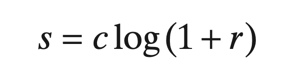
- Debes hacer una vecindad con dimensiones de 10x10 pixeles. 
- Aplica la transformación que aparece en la ecuación de tal forma que los pixeles cambien dependiendo de la posición (r) y el coeficiente c (de tu elección).
- Debes hacer la misma operación a lo largo y ancho de toda la imagen. ESto implica, de forma iterativa, recorrer la imagen.

In [13]:
# Divide la imagen en sus tres canales: B, G, R.
b_channel, g_channel, r_channel = cv.split(img)

# Se define el coeficiente c para cada canal en función del valor máximo en cada canal.

c_b = 255 / (np.log(1 + np.max(b_channel)))
c_g = 255 / (np.log(1 + np.max(g_channel)))
c_r = 255 / (np.log(1 + np.max(r_channel)))

# Se obtienen las dimensiones de la imagen
height, width, _ = img.shape

# Se crean las matrices vacias para almacenar los canales transformados
log_transformed_b = np.zeros((height, width), dtype=np.float32)
log_transformed_g = np.zeros((height, width), dtype=np.float32)
log_transformed_r = np.zeros((height, width), dtype=np.float32)

# Se define el tamaño de la vecindad
block_size = 10

# Funcion para aplicar una transformacion logaritmica a un bloque
def apply_log_transform(block, c):
    return c * np.log(1 + block)

# Se itera sobre la imagen en bloques de 10x10 píxeles para cada canal.
for i in range(0, height, block_size):
    for j in range(0, width, block_size):
        # Se definen los limites del bloque
        i_end = min(i + block_size, height)
        j_end = min(j + block_size, width)
        
        # Extraccion de bloques
        block_b = b_channel[i:i_end, j:j_end]
        block_g = g_channel[i:i_end, j:j_end]
        block_r = r_channel[i:i_end, j:j_end]
        
        # Aplicacion de la transformada a cada bloque
        log_transformed_b[i:i_end, j:j_end] = apply_log_transform(block_b, c_b)
        log_transformed_g[i:i_end, j:j_end] = apply_log_transform(block_g, c_g)
        log_transformed_r[i:i_end, j:j_end] = apply_log_transform(block_r, c_r)

# Se convierten los canales transformados a un tipo entero sin signo de 8 bits.
log_transformed_b = np.array(log_transformed_b, dtype=np.uint8)
log_transformed_g = np.array(log_transformed_g, dtype=np.uint8)
log_transformed_r = np.array(log_transformed_r, dtype=np.uint8)

# Se combinan los canales transformados en una imagen
log_transformed_img = cv.merge([log_transformed_b, log_transformed_g, log_transformed_r])

# Se muestra la imagen originalk y la transformada
cv.imshow('Imagen original',img)
cv.imshow('Log Transformed Color Image', log_transformed_img)
cv.waitKey(0)
cv.destroyAllWindows()


C:\Users\matia\AppData\Local\Temp\ipykernel_1232\219308133.py:23: RuntimeWarning: divide by zero encountered in log
  return c * np.log(1 + block)
C:\Users\matia\AppData\Local\Temp\ipykernel_1232\219308133.py:45: RuntimeWarning: invalid value encountered in cast
  log_transformed_r = np.array(log_transformed_r, dtype=np.uint8)


#### 2.4 Operación con Kernel
- Realiza tres operaciones de convolución en cascada. 
- Utiliza torch nn.Conv2d
- Debes calcular el stride, padding y demás parámetros para que obtengas 16 canales de salida.
- Muestra una imagen de cada canal resultante de la convolución.

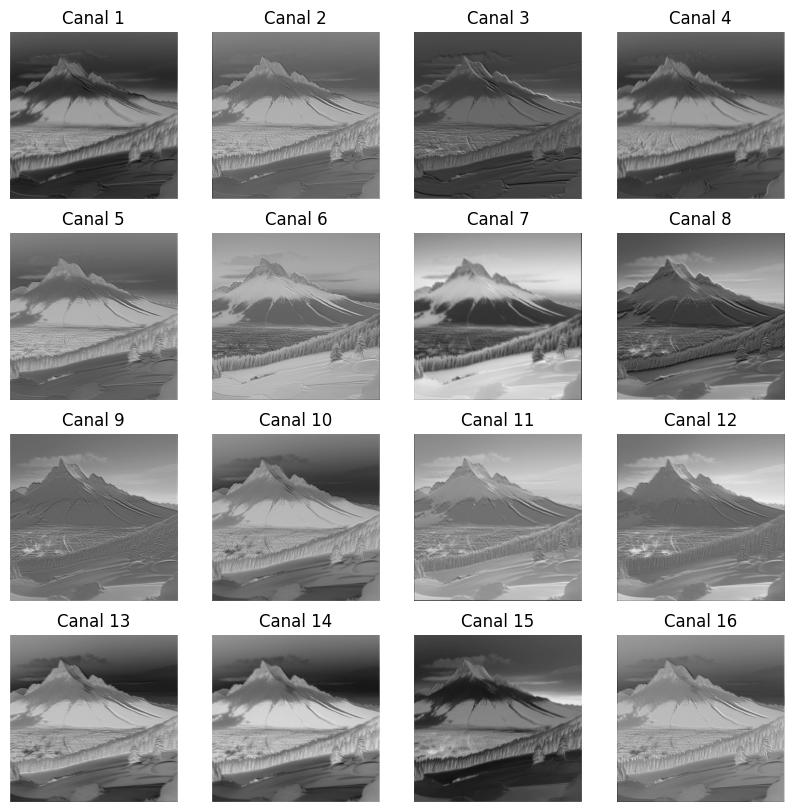

In [7]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Convertir de BGR a RGB
image = cv.cvtColor(img, cv.COLOR_BGR2RGB)  

# Convertir la imagen a un tensor de PyTorch
image_tensor = torch.tensor(image).float().permute(2, 0, 1).unsqueeze(0)  # Cambiar el orden de los ejes y añadir una dimensión batch

# Definir las capas de convolución
conv1 = nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, stride=1, padding=1)
conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1)
conv3 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=1, padding=1)

# Aplicar las convoluciones en cascada
output1 = conv1(image_tensor)
output2 = conv2(output1)
output3 = conv3(output2)

# Convertir la salida a formato numpy para visualización
output_np = output3.detach().numpy()

# Crear una figura para mostrar los canales
fig, axs = plt.subplots(4, 4, figsize=(10, 10))

# Visualizar cada canal de salida
for i in range(16):
    ax = axs[i // 4, i % 4]
    ax.imshow(output_np[0, i, :, :], cmap='gray')
    ax.axis('off')
    ax.set_title(f'Canal {i+1}')

plt.show()

## 3. Realiza la inversión de imagen

### 3.1 Utilizando estrictamente numpy, busca y usa una imagen binaria y realizar la inversión de dicha imagen.
### Recuerda adjuntar la imagen a la entrega de tu trabajo.


In [8]:
import numpy as np

# Cargar la imagen binaria
imagen = cv.imread('binary_image.jpg')
imagen_array = np.array(imagen)

# Invertir la imagen
imagen_invertida = np.where(imagen_array == 0, 255, 0).astype(np.uint8)

# Mostrar imagen binaria original e invertida
cv.imshow('Imagen Binaria',imagen)
cv.imshow('Imagen Binaria invertida',imagen_invertida)

cv.waitKey(0)
cv.destroyAllWindows()


### 3.1 Usando Pytorch y opencv, realiza la inversión de la misma imagen.



In [9]:
import torchvision.transforms as transforms
import numpy as np

# Función para invertir una imagen binaria
def invert_binary_image(image):
    # Convertir la imagen a tensor y normalizar
    transform = transforms.Compose([
        transforms.ToTensor(),
    ])
    tensor_image = transform(image).unsqueeze(0)

    # Invertir la imagen utilizando PyTorch
    inverted_image = 1 - tensor_image

    # Convertir la imagen invertida a numpy array y escalar a 0-255
    inverted_image_np = (inverted_image.squeeze().numpy() * 255).astype(np.uint8)

    return inverted_image_np

# Cargar la imagen binaria utilizando OpenCV
binary_image = cv.imread('binary_image.jpg', cv.IMREAD_GRAYSCALE)

# Invertir la imagen
inverted_image = invert_binary_image(binary_image)

# Mostrar la imagen original y la imagen invertida
cv.imshow('Original', binary_image)
cv.imshow('Invertida', inverted_image)
cv.waitKey(0)
cv.destroyAllWindows()


## 4. Segmentación de imagen
#### 4.1 Realiza un algoritmo para dividir una imagen con 3 canales RGB de 512x512, en parches (secciones) de 16x16. Presenta cada parche generado de la imagen.
El algoritmo debe tolerar el cambio de imagen por una de menor tamano (128, 64). Claramente, en cada caso el número de parches será menor. 
    

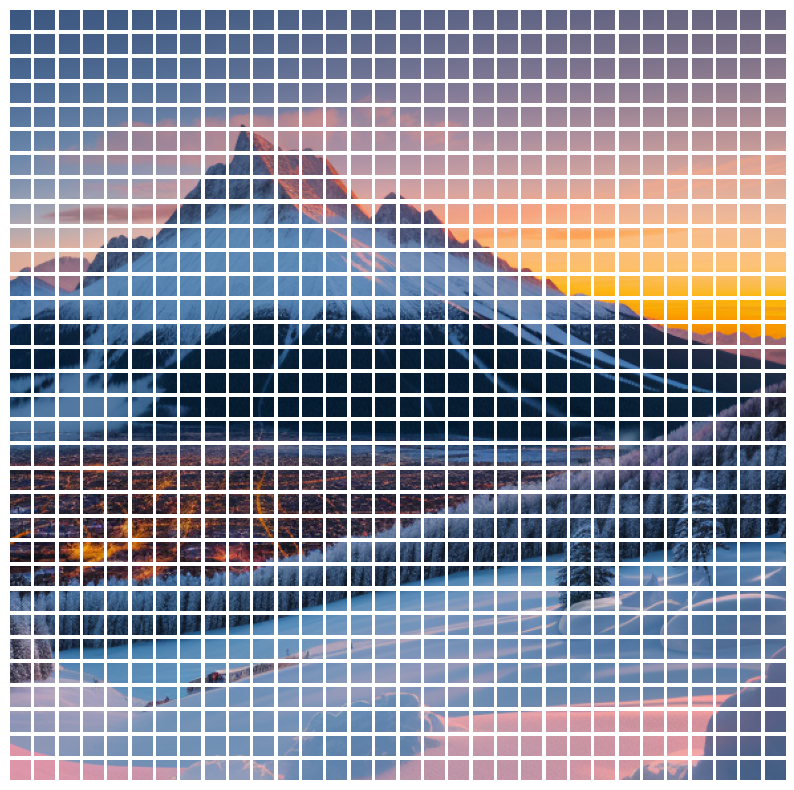

In [12]:
# Función para dividir la imagen en parches de tamaño especificado
def dividir_imagen(imagen, tamano_parche):
    alto, ancho, _ = imagen.shape
    parches = []
    # Iterar sobre la imagen con pasos del tamaño del parche
    for y in range(0, alto, tamano_parche):
        for x in range(0, ancho, tamano_parche):
            # Recortar el parche de la imagen
            parche = imagen[y:y+tamano_parche, x:x+tamano_parche]
            # Agregar el parche a la lista de parches
            parches.append(parche)
    return parches

# Función para mostrar los parches utilizando Matplotlib
def mostrar_parches(parches):
    # Calcular el número de parches y organizarlos en una cuadrícula
    num_parches = len(parches)
    filas = int(np.sqrt(num_parches))
    columnas = int(np.ceil(num_parches / filas))
    
    # Crear una figura y ejes de Matplotlib para mostrar los parches
    fig, axs = plt.subplots(filas, columnas, figsize=(10, 10))
    axs = axs.flatten()  # Convertir los ejes a una lista plana
    
    # Iterar sobre cada parche y mostrarlo en su respectivo eje
    for i, parche in enumerate(parches):
        axs[i].imshow(cv.cvtColor(parche, cv.COLOR_BGR2RGB))  # Convertir BGR a RGB para Matplotlib
        axs[i].axis('off')  # Desactivar los ejes
    plt.show()

# Dividir la imagen en parches de 16x16
tamano_parche = 16
parches = dividir_imagen(img, tamano_parche)

# Mostrar cada parche generado de la imagen
mostrar_parches(parches)


## 5. Referencias
<p align="justify">
    
[OpenCV] https://docs.opencv.org/4.x/d7/da8/tutorial_table_of_content_imgproc.html

[inversion] https://medium.com/analytics-vidhya/inverting-an-image-using-numpys-broadcasting-method-1f5beb7f9fa5#:~:text=In%20order%20to%20invert%20the,negation)%20operation%20to%20the%20image.
